In [ ]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tqdm.notebook import tqdm_notebook

os.environ["OPENCV_IO_MAX_result_PIXELS"] = pow(2,40).__str__()

import cv2

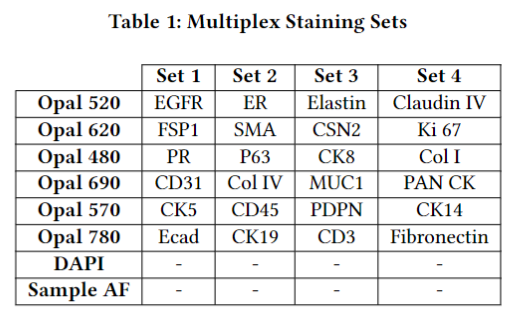

In [ ]:
# Create a dictionary with the multiplex channel information
# Creating it as a file should be usefull as they might be using different stains

multiplex_sets = {
    "set1":{"Opal_520":"EGFR",
            "Opal_620":"FSP1",
            "Opal_480":"PR",
            "Opal_690":"CD31",
            "Opal_570":"CK5",
            "Opal_780":"Ecad",
            "DAPI":"DAPI",
            "Sample_AF":"Sample_AF"
    },
    "set2":{"Opal_520":"ER",
            "Opal_620":"SMA",
            "Opal_480":"P63",
            "Opal_690":"Col IV",
            "Opal_570":"CD45",
            "Opal_780":"CK19",
            "DAPI":"DAPI",
            "Sample_AF":"Sample_AF"
    },
    "set3":{"Opal_520":"Elastin",
            "Opal_620":"CSN2",
            "Opal_480":"CK8",
            "Opal_690":"MUC1",
            "Opal_570":"PDPN",
            "Opal_780":"CD3",
            "DAPI":"DAPI",
            "Sample_AF":"Sample_AF"
    },
    "set4":{"Opal_520":"Claudin IV",
            "Opal_620":"Ki67",
            "Opal_480":"Col I",
            "Opal_690":"PAN CK",
            "Opal_570":"CK14",
            "Opal_780":"Fibronectin",
            "DAPI":"DAPI",
            "Sample_AF":"Sample_AF"
    },
}

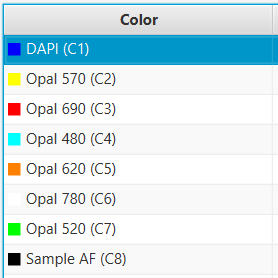

## Multiplex Using Napari

In [ ]:
import napari
import numpy as np

dir = "./data/first_multiplex/set1/processed_32/*Set1_023*.tif"
imgs_paths = glob.glob(dir)

for i, img_path in enumerate(imgs_paths):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load grayscale image
    img = img[:, :, np.newaxis]
    if i == 0:
        image = img
    else:
        image = np.concatenate((image, img), axis=2) 


# create viewer instance 
viewer = napari.Viewer()

# add channels one by one
viewer.add_image(image[..., 0], colormap="blue", name="Channel 1", blending="additive")
viewer.add_image(image[..., 1], colormap="yellow", name="Channel 2", blending="additive")
viewer.add_image(image[..., 2], colormap="red", name="Channel 3", blending="additive")
viewer.add_image(image[..., 3], colormap="magenta", name="Channel 4", blending="additive")
viewer.add_image(image[..., 4], colormap="orange", name="Channel 5", blending="additive")
viewer.add_image(image[..., 5], colormap="white", name="Channel 6", blending="additive")
viewer.add_image(image[..., 6], colormap="green", name="Channel 7", blending="additive")
viewer.add_image(image[..., 7], colormap="black", name="Channel 8", blending="additive")


## Blend Multiplex

In [ ]:
from utils._preprocess_multiplex import blend_multiplex, group_multiplex_files

In [ ]:
blend_multiplex("./data/multiplex/processed_32", invert_image=True)

In [ ]:
group_multiplex_files()

## Inspect results

### Multiplex using OpenCV/Matplotlib

In [ ]:
from matplotlib import cm

pattern = "./data/first_multiplex/processed_32/*Set1_023*.tif"
imgs_paths = glob.glob(pattern)

# Load the images in grayscale
ch1 = cv2.imread(imgs_paths[0], cv2.IMREAD_GRAYSCALE)
ch2 = cv2.imread(imgs_paths[1], cv2.IMREAD_GRAYSCALE)
ch3 = cv2.imread(imgs_paths[2], cv2.IMREAD_GRAYSCALE)
ch4 = cv2.imread(imgs_paths[3], cv2.IMREAD_GRAYSCALE)
ch5 = cv2.imread(imgs_paths[4], cv2.IMREAD_GRAYSCALE)
ch6 = cv2.imread(imgs_paths[5], cv2.IMREAD_GRAYSCALE)
ch7 = cv2.imread(imgs_paths[6], cv2.IMREAD_GRAYSCALE)
ch8 = cv2.imread(imgs_paths[7], cv2.IMREAD_GRAYSCALE)

# When using matplotlib make sure to normalize images.

# The choice of colormaps is quite limited using opencv
# Maybe is worth to explore other options
# Apply color maps
# ch1_colormap = np.uint8(cm.hot(ch1)*255)
# ch2_colormap = np.uint8(cm.bone(ch2)*255)
# ch3_colormap = np.uint8(cm.pink(ch3)*255)
# ch4_colormap = np.uint8(cm.afmhot(ch4)*255)
# ch5_colormap = np.uint8(cm.gist_heat(ch5)*255)
# ch6_colormap = np.uint8(cm.copper(ch6)*255)
# ch7_colormap = np.uint8(cm.gist_gray(ch7)*255)
# ch8_colormap = np.uint8(cm.gray(ch8)*255)

ch1_colormap = cv2.applyColorMap(ch1, cv2.COLORMAP_OCEAN)
ch2_colormap = cv2.applyColorMap(ch2, cv2.COLORMAP_BONE)
ch3_colormap = cv2.applyColorMap(ch3, cv2.COLORMAP_MAGMA)
ch4_colormap = cv2.applyColorMap(ch4, cv2.COLORMAP_INFERNO)
ch5_colormap = cv2.applyColorMap(ch5, cv2.COLORMAP_DEEPGREEN)
ch6_colormap = cv2.applyColorMap(ch6, cv2.COLORMAP_PINK)
ch7_colormap = cv2.applyColorMap(ch7, cv2.COLORMAP_OCEAN)
ch8_colormap = cv2.applyColorMap(ch8, cv2.COLORMAP_OCEAN)



step1 = cv2.add(ch1_colormap, ch2_colormap)
step2 = cv2.add(step1, ch3_colormap)
step3 = cv2.add(step2, ch4_colormap)
step4 = cv2.add(step3, ch5_colormap)
step5 = cv2.add(step4, ch6_colormap)
step6 = cv2.add(step5, ch7_colormap)
blended_image = cv2.add(step6, ch8_colormap)
# Display the images
plt.figure(figsize=(10, 7))

plt.title('Final Image')
# plt.imshow(blended_image)
plt.imshow(cv2.cvtColor((255-blended_image), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20,10))

ax1.imshow(ch1_colormap)
ax2.imshow(ch2_colormap)
ax3.imshow(ch3_colormap)
ax4.imshow(ch4_colormap)
ax5.imshow(ch5_colormap)
ax6.imshow(ch6_colormap)
ax7.imshow(ch7_colormap)
ax8.imshow(ch8_colormap)

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
ax5.axis("off")
ax6.axis("off")
ax7.axis("off")
ax8.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from natsort import natsorted

blended_multiplex_paths = natsorted(glob.glob("./data/blended_multiplex/*.tif"))
blended_multiplex_paths_i = natsorted(glob.glob("./data/blended_multiplex_i/*.tif"))


for a, b in zip(blended_multiplex_paths, blended_multiplex_paths_i):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
    ax1.set_title(a)
    ax1.imshow(cv2.imread(a, cv2.COLOR_BGR2RGB))
    ax2.set_title(b)
    ax2.imshow(cv2.imread(b, cv2.COLOR_BGR2RGB))
    ax1.axis("off")
    ax2.axis("off")
    plt.show()
    break


In [ ]:
directory = "./data/blended_multiplex"
processed_path = os.path.join(directory, "processed_"+str(32))
print(processed_path)
print(glob.glob(os.path.join(processed_path, "*.*")))

In [ ]:
import re
files = glob.glob("./data/he_multiplex/*scan*.tif")
for file in files:
    match = re.search(r'_(\d+)_', file)
    if match:
        number = match.group(1)
        new_file_name = f"./data/he_multiplex/{number}.tif"
        os.rename(file, new_file_name)
        print(f"Renamed '{file}' to '{new_file_name}'")